<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/Mgg5/Dataset_Tanaman_Padi_Sumatera_Indonesia_Tassya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Tassya Ramadhanti**
# **NIM  : 1103204016**
# **Predictive Analytics "Dataset Tanaman Padi Sumatera, Indonesia"**

In [1]:
!pip install kaggle

In [1]:
from google.colab import files

# Upload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tassyaramadhanti","key":"3182cbc2ed662c2e7a9035299a970b54"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [16]:
!kaggle datasets list -s "Dataset Tanaman Padi Sumatera, Indonesia"

ref                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------  ----------------------------------------  ----  -------------------  -------------  ---------  ---------------  
ardikasatria/datasettanamanpadisumatera  Dataset Tanaman Padi Sumatera, Indonesia   5KB  2022-12-11 01:25:38           2234         52  0.7058824        


In [17]:
# Download dan ekstrak dataset, dimana nantinya akan satu direktori dengan notebook ini
!kaggle datasets download ardikasatria/datasettanamanpadisumatera --unzip

  0% 0.00/4.75k [00:00<?, ?B/s]
100% 4.75k/4.75k [00:00<00:00, 13.9MB/s]


In [18]:
#Library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [19]:
# Ganti 'nama_file.csv' dengan nama file CSV Anda
file_path = '/content/Data_Tanaman_Padi_Sumatera_version_1.csv'

# Baca file CSV menjadi dataframe
df = pd.read_csv(file_path)

In [22]:
#Menampilkan DataFrame
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [25]:
# Tampilkan jumlah nilai unik untuk setiap fitur
print(df.nunique(axis=0))

Provinsi            8
Tahun              28
Produksi          224
Luas Panen        224
Curah hujan       220
Kelembapan        180
Suhu rata-rata    136
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [26]:
# Mengubah Nama Atribut 'Luas Panen' Menjadi 'Luas_Panen'
df['Luas_Panen'] = df['Luas Panen']

# Mengubah Nama Atribut 'Curah hujan' Menjadi 'Curah_Hujan'
df['Curah_Hujan'] = df['Curah hujan']

# Mengubah Nama Atribut 'Suhu rata-rata' Menjadi 'Suhu'
df['Suhu'] = df['Suhu rata-rata']

# Menghapus Atribut Lama
df.drop(columns=['Luas Panen', 'Curah hujan', 'Suhu rata-rata'], inplace=True)

In [27]:
#Melihat Keberadaan Data 'null' (missing value) pada Dataset
df.isnull().sum()

Provinsi       0
Tahun          0
Produksi       0
Kelembapan     0
Luas_Panen     0
Curah_Hujan    0
Suhu           0
dtype: int64

In [28]:
#Melihat Deskripsi Statistika Dataset
df.describe()

,Tahun,Produksi,Kelembapan,Luas_Panen,Curah_Hujan,Suhu
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,80.948705,374349.966920,2452.490759,26.801964
std,8.095838,1.161387e+06,4.878680,232751.161987,1031.972625,1.197041
min,1993.000000,4.293800e+04,54.200000,63142.040000,222.500000,22.190000
25%,1999.750000,5.488570e+05,78.975000,146919.500000,1703.525000,26.177500
50%,2006.500000,1.667773e+06,82.375000,373551.500000,2315.700000,26.730000
75%,2013.250000,2.436851e+06,84.000000,514570.250000,3039.700000,27.200000
max,2020.000000,4.881089e+06,90.600000,872737.000000,5522.000000,29.850000


In [30]:
#Cek Nilai 0 pada Atribut 'Luas Panen' dan 'Produksi'
Kelembapan = (df.Kelembapan == 0).sum()
Curah_Hujan = (df.Curah_Hujan == 0).sum()

print("Nilai 0 di kolom yang ada: ", Kelembapan)
print("Nilai 0 di kolom yang ada: ", Curah_Hujan)

Nilai 0 di kolom yang ada:  0
Nilai 0 di kolom yang ada:  0


In [31]:
#Cek Ukuran Data Saat Ini
df.shape

(224, 7)

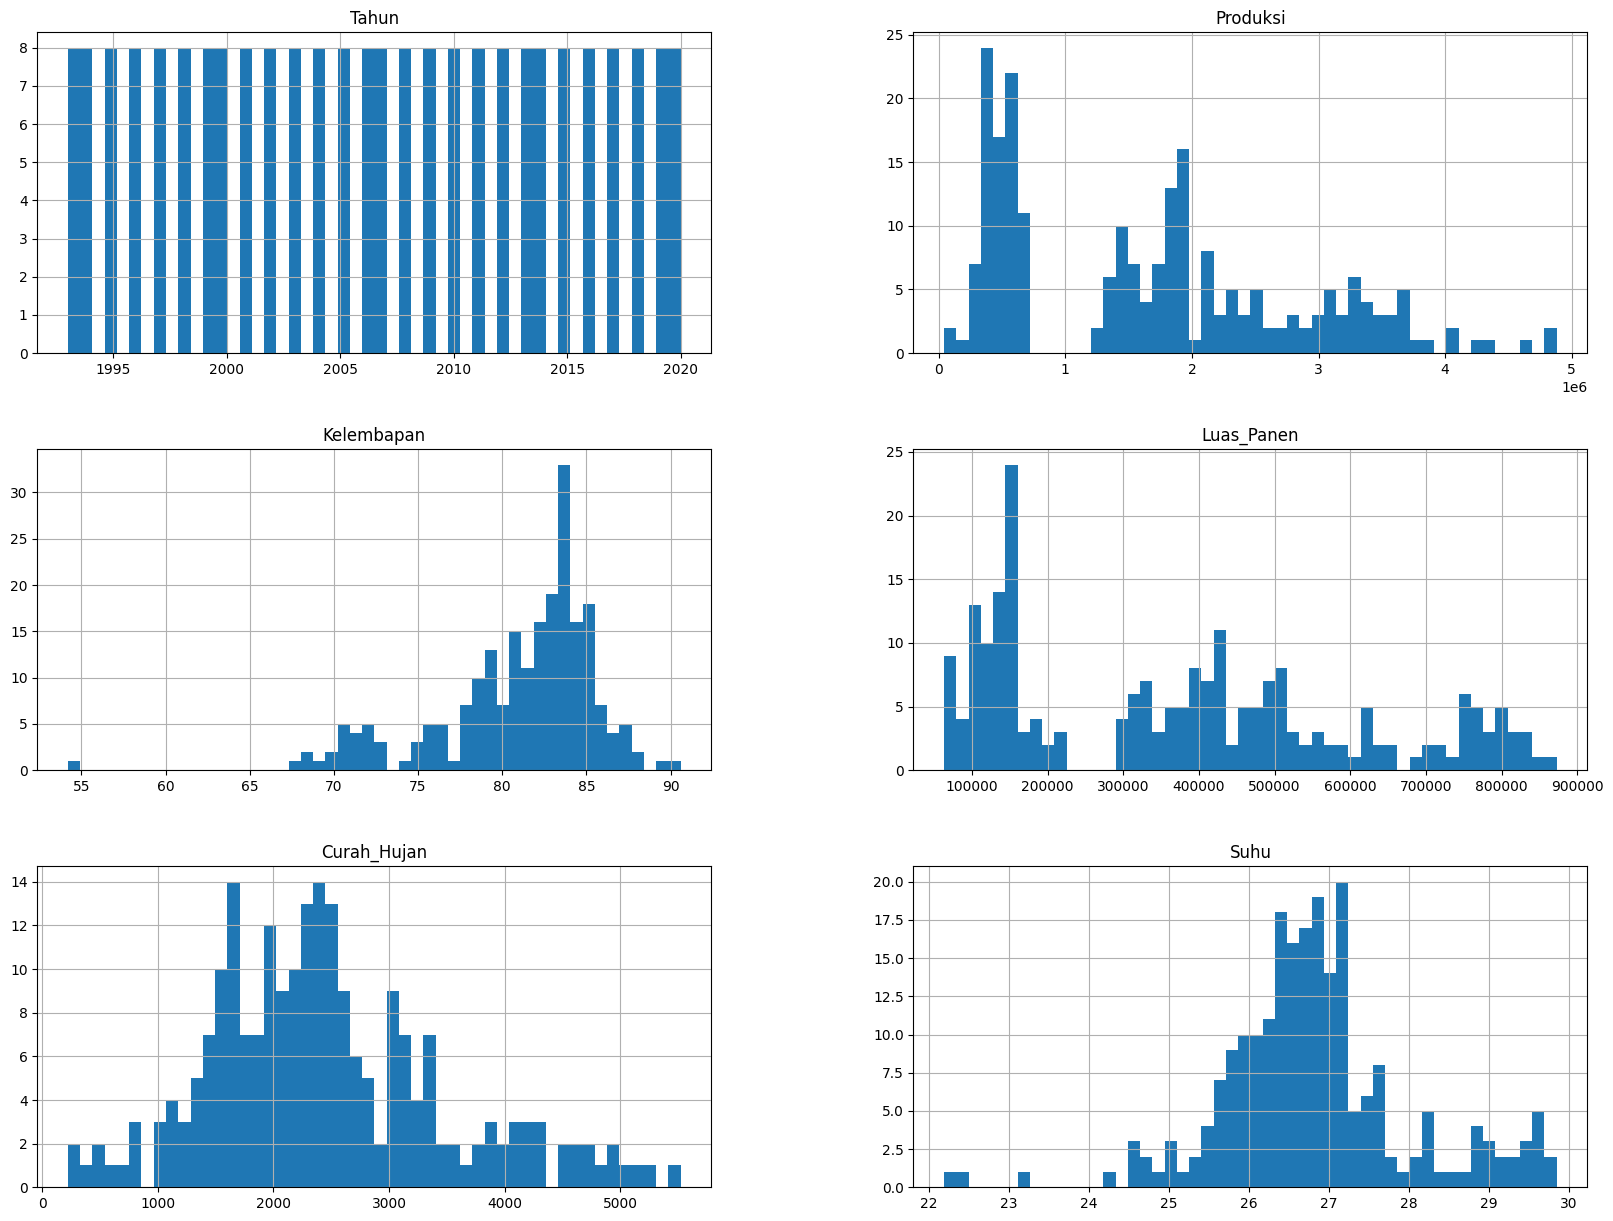

In [32]:
#Analisis Fitur Numerik dengan data fitur tunggal
df.hist(bins=50, figsize=(20,15))
plt.show()

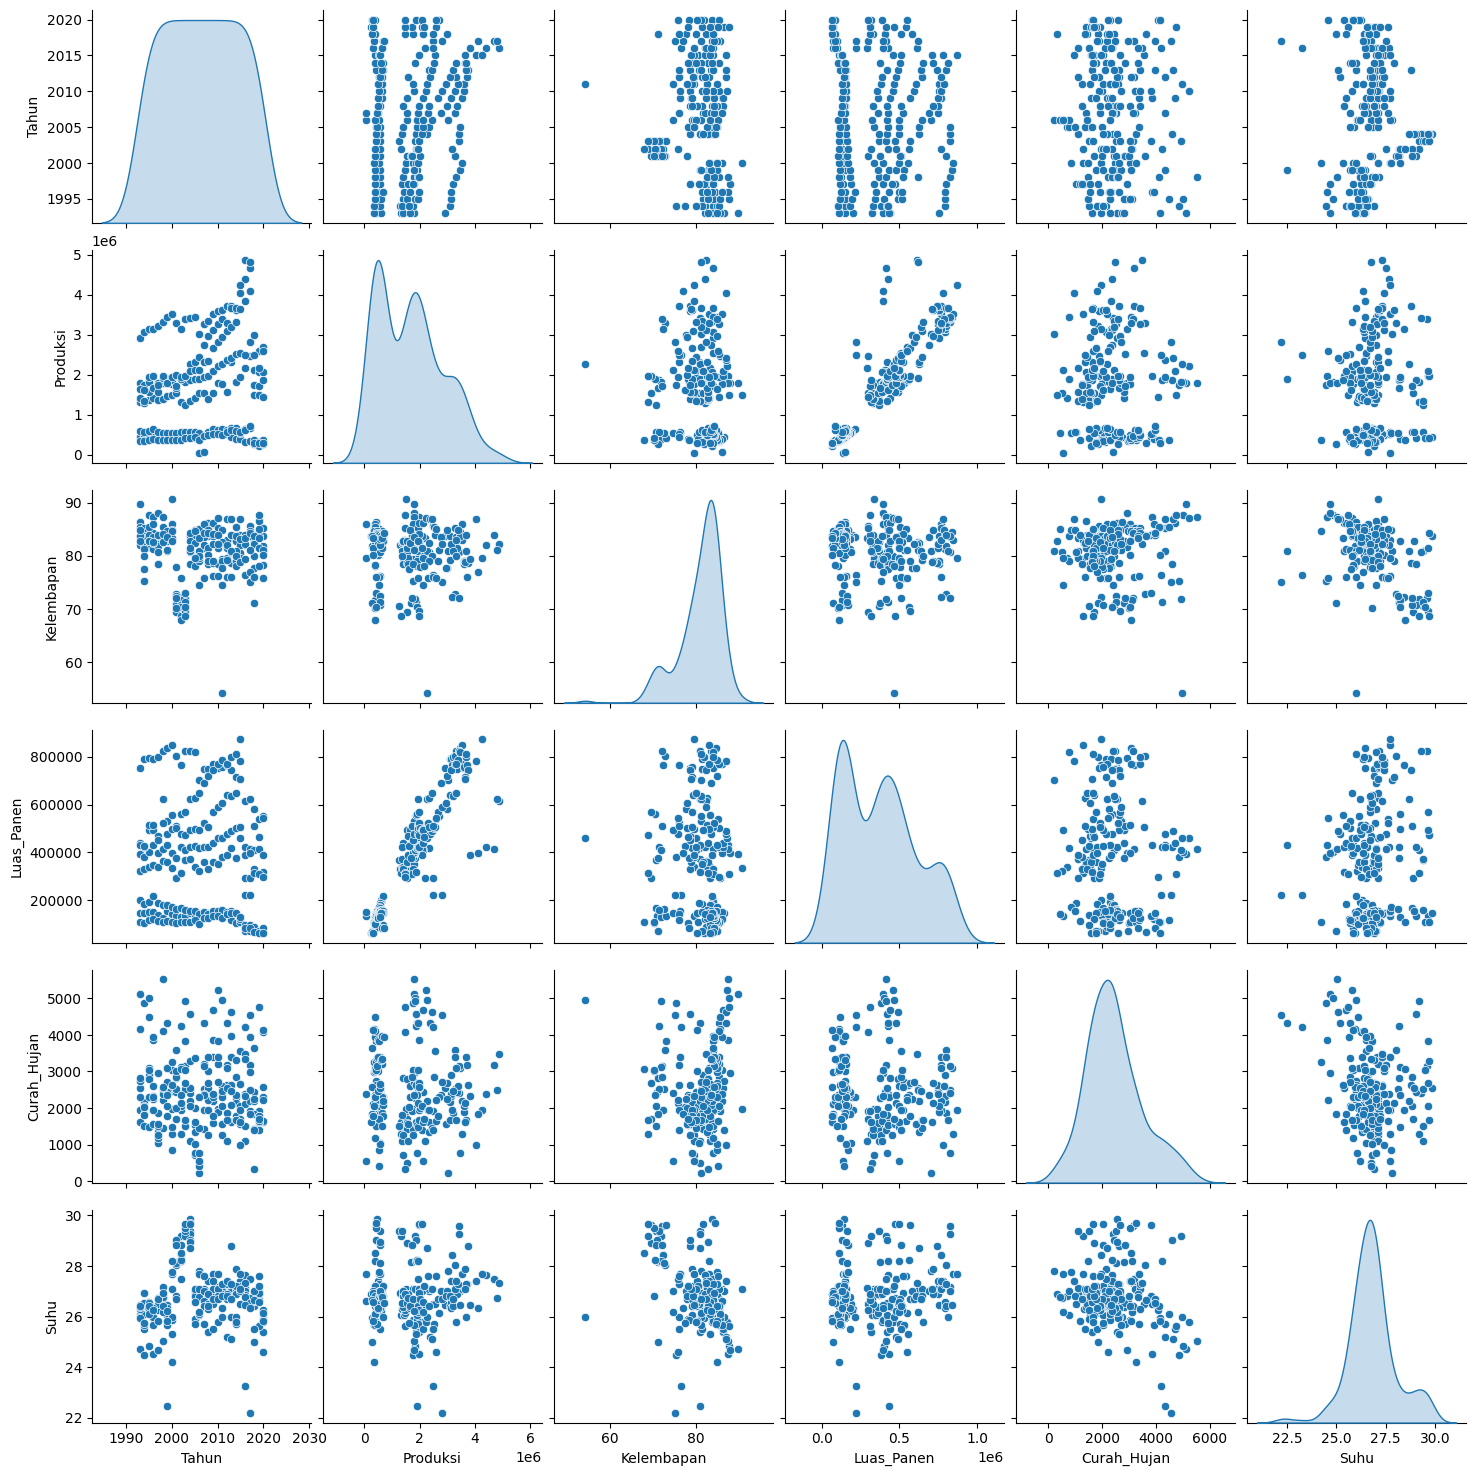

In [33]:
#Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-34-15665966c9df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

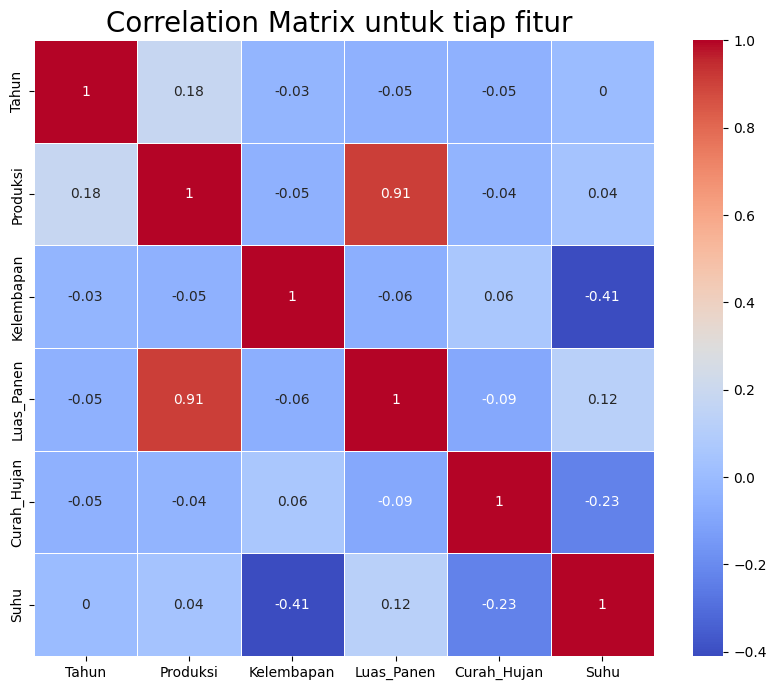

In [34]:
#Evaluasai Skor Korelasi dengan Fungsi 'corr()'
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

In [51]:
#Inisialisasi atribut dan target
X = df[['Tahun', 'Kelembapan', 'Luas_Panen','Curah_Hujan','Suhu']]
y = df['Produksi']

In [37]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [38]:
#Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji.
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 224
Total # sampel di seluruh dataset: 201
Total # sampel di seluruh datasett: 23


In [39]:
# Standarisasi Data Latih
numerical_features = ['Tahun', 'Kelembapan', 'Luas_Panen', 'Curah_Hujan', 'Suhu']
scaler = StandardScaler()
scaler.fit(X[numerical_features])
X[numerical_features] = scaler.transform(X[numerical_features])
X.head()

<ipython-input-39-ce9479c5e17e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.transform(X[numerical_features])


,Tahun,Kelembapan,Luas_Panen,Curah_Hujan,Suhu
0,-1.671258,0.215970,-0.218580,-0.801707,-0.621220
1,-1.547461,0.240622,-0.195103,-0.904653,0.098827
2,-1.423664,0.363882,-0.151130,-0.948356,-0.445395
3,-1.299867,0.421403,-0.112504,-0.869690,-0.604475
4,-1.176070,0.310469,-0.158415,-1.081409,-0.411904


In [40]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

,Tahun,Kelembapan,Luas_Panen,Curah_Hujan,Suhu
count,201.0000,201.0000,201.0000,201.0000,201.0000
mean,2006.4975,80.9748,374998.1458,2471.4484,26.7922
std,8.2214,4.8437,234613.6735,1021.5252,1.1848
min,1993.0000,54.2000,63142.0400,222.5000,22.1900
25%,1999.0000,79.0000,147167.0000,1786.2000,26.1900
50%,2006.0000,82.4500,367636.0000,2317.6000,26.7000
75%,2014.0000,84.0000,514363.0000,3040.6000,27.2000
max,2020.0000,90.6000,872737.0000,5522.0000,29.8500


In [41]:
# Scaling Data Uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

**Decision Tree (Pengembangan Model)**

In [42]:
dtr = DecisionTreeRegressor(random_state=42)

In [43]:
dtr.fit(X_train, y_train)
score_dtr = dtr.score(X_train, y_train)
print(score_dtr)

1.0


**Random Forest Regressor**

In [44]:
rfr = RandomForestRegressor(n_estimators=500)

In [45]:
rfr.fit(X_train,y_train)
score_rfr = rfr.score(X_train,y_train)
print(score_rfr)

0.9888005249741202


**KKN**

In [46]:
knr = KNeighborsRegressor(n_neighbors = 2)

In [47]:
knr.fit(X_train,y_train)
score_knr = knr.score(X_train,y_train)
print(score_knr)

0.901505363249687


**EVALUASI MODEL

Nilai RMSE untuk Masing-masing Model pada Proses Latihan Maupun Pengujian

Fungsi predict() digunakan untuk memprediksi hasil observasi data uji.
Fungsi mean_squared_error digunakan untuk menghitung niai MSE atau Mean Squared Error suatu model.
Fungsi mean_squared_error digunakan untuk menghitung niai MSE atau Mean Squared Error suatu model.**

In [48]:
rmse = pd.DataFrame(columns=['train', 'test'], index=['DTR','RFR','KNR'])
model_dict = {'DTR': dtr, 'RFR': rfr, 'KNR': knr}
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 )
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3)

rmse

,train,test
DTR,0.0,51584.261441
RFR,3935.220813,55289.679416
KNR,11670.15341,53444.935447


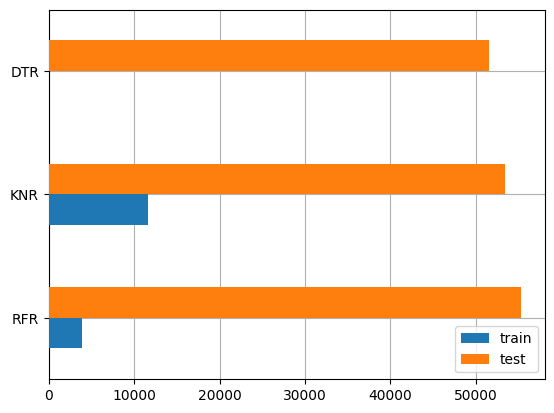

In [49]:
#Memvisualisasikan Nilai RMSE untuk Masing-masing Model Pada Proses Latihan Maupun Pengujian
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [50]:
#Uji model dengan data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_DTR,prediksi_RFR,prediksi_KNR
177,379818.0,337421.0,192341.6,263899.6
